In [167]:
setwd('/import/DB/zhang//data')

In [3]:
getwd()

[1] "/import/DB/zhang/data"

In [4]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [6]:
dir='.' 
samples=list.files( dir )
samples

[1] "GSE196678"    "S1"           "S2"           "S3"           "S4"          
 [6] "WH2109002886" "WH2109013167" "WH2112008442" "WH2201006389" "WH2203005877"

In [7]:
sceList = lapply(samples,function(pro){ 
 #pro=samples[1]
 folder=file.path(dir ,pro ) 
 print(pro)
 print(folder)
 print(list.files(folder))
 sce=CreateSeuratObject(counts = Read10X(paste0(folder,'/filtered_feature_bc_matrix')),
 project = pro )

 return(sce)
})

[1] "GSE196678"
[1] "./GSE196678"
[1] "filtered_feature_bc_matrix"
[1] "S1"
[1] "./S1"
[1] "filtered_feature_bc_matrix"
[1] "S2"
[1] "./S2"
[1] "filtered_feature_bc_matrix"
[1] "S3"
[1] "./S3"
[1] "filtered_feature_bc_matrix"
[1] "S4"
[1] "./S4"
[1] "filtered_feature_bc_matrix"
[1] "WH2109002886"
[1] "./WH2109002886"
[1] "filtered_feature_bc_matrix"
[1] "WH2109013167"
[1] "./WH2109013167"
[1] "filtered_feature_bc_matrix"
[1] "WH2112008442"
[1] "./WH2112008442"
[1] "filtered_feature_bc_matrix"
[1] "WH2201006389"
[1] "./WH2201006389"
[1] "filtered_feature_bc_matrix"
[1] "WH2203005877"
[1] "./WH2203005877"
[1] "filtered_feature_bc_matrix"


In [8]:
single.ob=merge(sceList[[1]],sceList[2:length(sceList)])

Warning message in CheckDuplicateCellNames(object.list = objects):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [9]:
single.ob

An object of class Seurat 
38629 features across 127480 samples within 1 assay 
Active assay: RNA (38629 features, 0 variable features)

In [10]:
immune.combined = single.ob

In [11]:
immune.combined[["percent.mt"]] <- PercentageFeatureSet(immune.combined,pattern = "^MT-")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



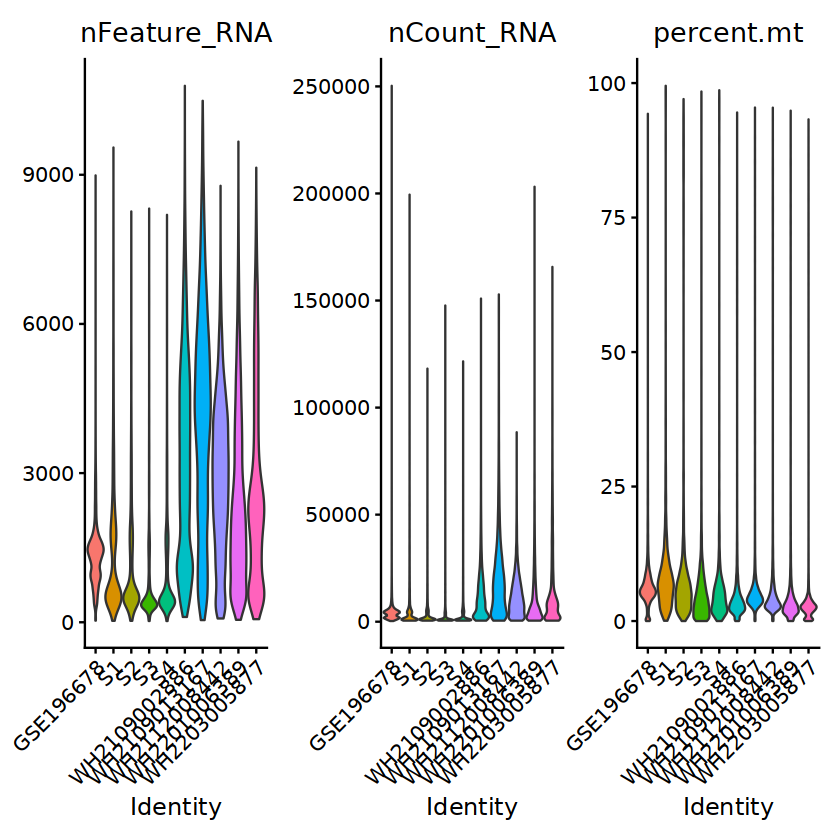

In [12]:
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")

In [13]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [14]:
ggsave('figure1.pdf',height =  4,width = 9)

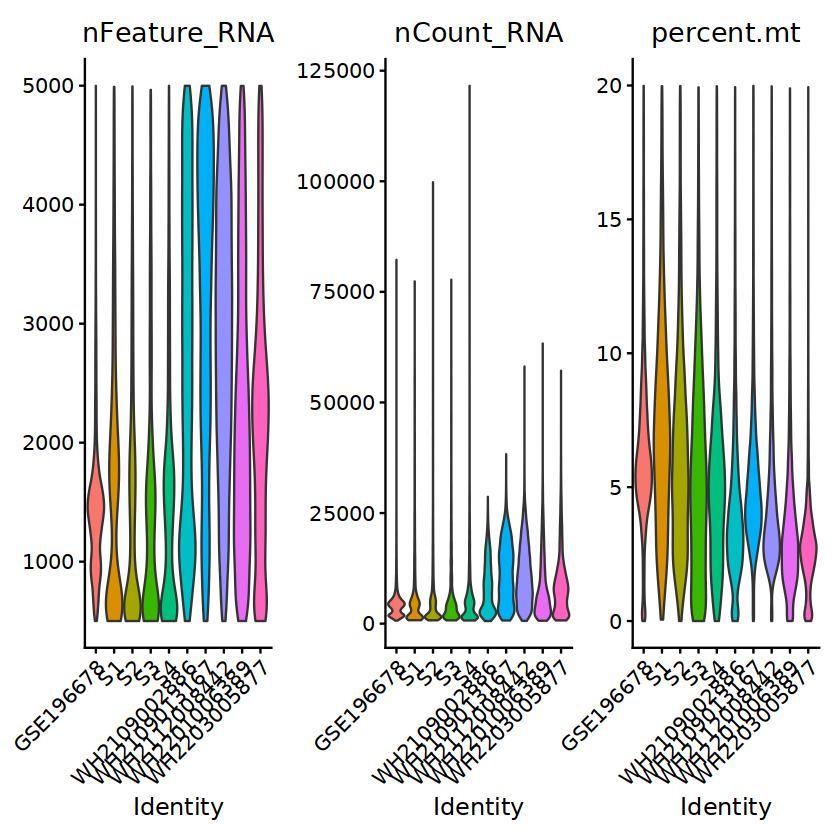

In [15]:
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 500 & nFeature_RNA < 5000 & percent.mt < 20)

VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")

ggsave('figure1-1.pdf',height =  4,width = 9)

In [16]:
table(immune.combined$orig.ident)


   GSE196678           S1           S2           S3           S4 WH2109002886 
       28687         3819         6720         2520         4878        11383 
WH2109013167 WH2112008442 WH2201006389 WH2203005877 
        6412        10980        10604         7372 

### 去除双细胞

In [17]:
library(DoubletFinder)
library(tidyverse)
library(Seurat)
library(patchwork)

Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::

In [18]:
immune.combined <-NormalizeData(immune.combined)
immune.combined <- ScaleData(immune.combined,feature=rownames(immune.combined), verbose = FALSE)
immune.combined <- FindVariableFeatures(object = immune.combined,selection.method = 'vst', nfeatures = 2000)
immune.combined <- RunPCA(immune.combined,  features = VariableFeatures(object = immune.combined) ,verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- RunTSNE(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- FindClusters(immune.combined)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
06:28:57 UMAP embedding parameters a = 0.9922 b = 1.112

06:28:57 Read 93375 rows and found 20 numeric columns

06:28:57 Using Annoy for neighbor search, n_neighbors = 30

06:28:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:29:10 Writing NN index file to temp file /tmp/RtmpNyb81x/file26d132018abaf

06:29:10 Searching Annoy index using 1 thread, search_k = 3000

06:29:41 Annoy recall = 100%

06:29:41 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 93375
Number of edges: 3123429

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9469
Number of communities: 43
Elapsed time: 64 seconds


In [19]:
H9 = immune.combined

In [20]:
paramSweep = function (seu, PCs = 1:20, sct = FALSE, num.cores = 1) 
{
    require(Seurat)
    require(fields)
    require(parallel)
    pK <- c(5e-04, 0.001, 0.005, seq(0.01, 0.3, by = 0.01))
    pN <- seq(0.05, 0.3, by = 0.05)
    min.cells <- round(nrow(seu@meta.data)/(1 - 0.05) - nrow(seu@meta.data))
    pK.test <- round(pK * min.cells)
    pK <- pK[which(pK.test >= 1)]
    orig.commands <- seu@commands
    if (nrow(seu@meta.data) > 10000) {
        real.cells <- rownames(seu@meta.data)[sample(1:nrow(seu@meta.data), 
            10000, replace = FALSE)]
        data <- seu@assays$RNA@counts[, real.cells]
        n.real.cells <- ncol(data)
    }
    if (nrow(seu@meta.data) <= 10000) {
        real.cells <- rownames(seu@meta.data)
        data <- seu@assays$RNA@counts
        n.real.cells <- ncol(data)
    }
    if (num.cores > 1) {
        require(parallel)
        cl <- makeCluster(num.cores)
        output2 <- mclapply(as.list(1:length(pN)), FUN = parallel_paramSweep, 
            n.real.cells, real.cells, pK, pN, data, orig.commands, 
            PCs, sct, mc.cores = num.cores)
        stopCluster(cl)
    }
    else {
        output2 <- lapply(as.list(1:length(pN)), FUN = parallel_paramSweep, 
            n.real.cells, real.cells, pK, pN, data, orig.commands, 
            PCs, sct)
    }
    sweep.res.list <- list()
    list.ind <- 0
    for (i in 1:length(output2)) {
        for (j in 1:length(output2[[i]])) {
            list.ind <- list.ind + 1
            sweep.res.list[[list.ind]] <- output2[[i]][[j]]
        }
    }
    name.vec <- NULL
    for (j in 1:length(pN)) {
        name.vec <- c(name.vec, paste("pN", pN[j], "pK", pK, 
            sep = "_"))
    }
    names(sweep.res.list) <- name.vec
    return(sweep.res.list)
}

In [21]:
sweep.res.list_kidney <- paramSweep(H9, PCs = 1:20, sct = FALSE)

Loading required package: fields

Loading required package: spam

Spam version 2.10-0 (2023-10-23) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: 'spam'


The following objects are masked from 'package:base':

    backsolve, forwardsolve


Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.2.3"

Try help(fields) to get started.

Loading required package: parallel



[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


Loading required package: KernSmooth

Warning message:
"package 'KernSmooth' was built under R version 4.2.3"
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: ROCR

Warning message:
"package 'ROCR' was built under R version 4.2.3"


NULL


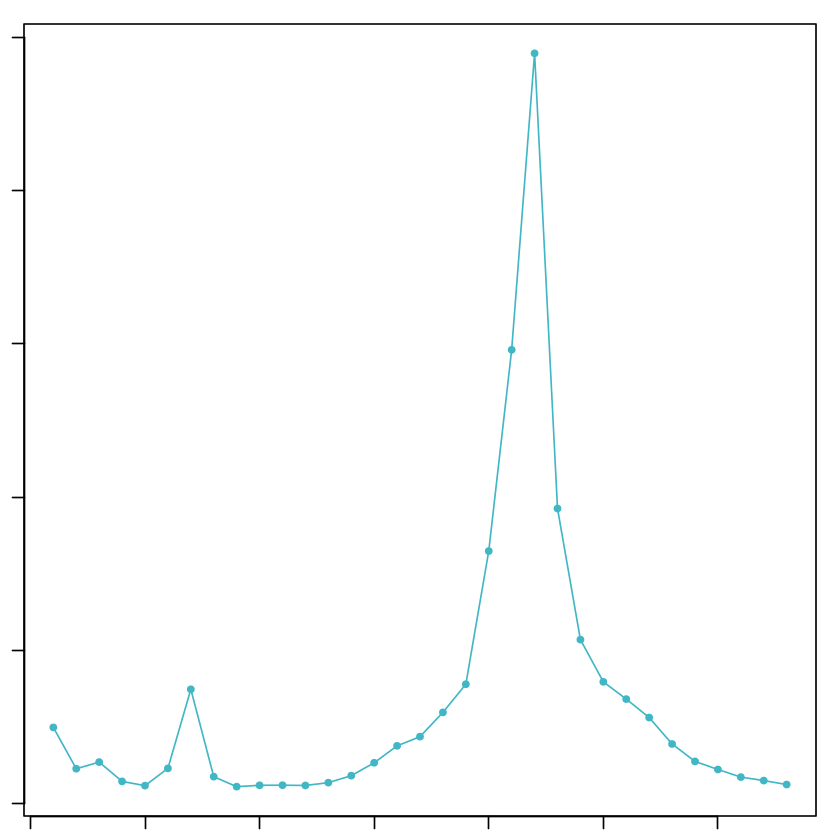

In [22]:
sweep.stats_kidney <- summarizeSweep(sweep.res.list_kidney, GT = FALSE)
bcmvn_kidney <- find.pK(sweep.stats_kidney)

In [23]:
pK_bcmvn <- bcmvn_kidney$pK[which.max(bcmvn_kidney$BCmetric)] %>% as.character() %>% as.numeric()

In [24]:
DoubletRate = ncol(H9)*8*1e-7

In [25]:
DoubletRate

[1] 0.0747

In [26]:
homotypic.prop <- modelHomotypic(H9$orig.ident)

In [27]:
nExp_poi <- round(DoubletRate*ncol(H9)) 
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))

In [28]:
doubletFinder = function (seu, PCs, pN = 0.25, pK, nExp, reuse.pANN = FALSE, 
    sct = FALSE, annotations = NULL) 
{
    require(Seurat)
    require(fields)
    require(KernSmooth)
    if (reuse.pANN != FALSE) {
        pANN.old <- seu@meta.data[, reuse.pANN]
        classifications <- rep("Singlet", length(pANN.old))
        classifications[order(pANN.old, decreasing = TRUE)[1:nExp]] <- "Doublet"
        seu@meta.data[, paste("DF.classifications", pN, pK, nExp, 
            sep = "_")] <- classifications
        return(seu)
    }
    if (reuse.pANN == FALSE) {
        real.cells <- rownames(seu@meta.data)
        data <- seu@assays$RNA@counts[, real.cells]
        n_real.cells <- length(real.cells)
        n_doublets <- round(n_real.cells/(1 - pN) - n_real.cells)
        print(paste("Creating", n_doublets, "artificial doublets...", 
            sep = " "))
        real.cells1 <- sample(real.cells, n_doublets, replace = TRUE)
        real.cells2 <- sample(real.cells, n_doublets, replace = TRUE)
        doublets <- (data[, real.cells1] + data[, real.cells2])/2
        colnames(doublets) <- paste("X", 1:n_doublets, sep = "")
        data_wdoublets <- cbind(data, doublets)
        if (!is.null(annotations)) {
            stopifnot(typeof(annotations) == "character")
            stopifnot(length(annotations) == length(Cells(seu)))
            stopifnot(!any(is.na(annotations)))
            annotations <- factor(annotations)
            names(annotations) <- Cells(seu)
            doublet_types1 <- annotations[real.cells1]
            doublet_types2 <- annotations[real.cells2]
        }
        orig.commands <- seu@commands
        if (sct == FALSE) {
            print("Creating Seurat object...")
            seu_wdoublets <- CreateSeuratObject(counts = data_wdoublets)
            print("Normalizing Seurat object...")
            seu_wdoublets <- NormalizeData(seu_wdoublets, normalization.method = orig.commands$NormalizeData.RNA@params$normalization.method, 
                scale.factor = orig.commands$NormalizeData.RNA@params$scale.factor, 
                margin = orig.commands$NormalizeData.RNA@params$margin)
            print("Finding variable genes...")
            seu_wdoublets <- FindVariableFeatures(seu_wdoublets, 
                selection.method = orig.commands$FindVariableFeatures.RNA$selection.method, 
                loess.span = orig.commands$FindVariableFeatures.RNA$loess.span, 
                clip.max = orig.commands$FindVariableFeatures.RNA$clip.max, 
                mean.function = orig.commands$FindVariableFeatures.RNA$mean.function, 
                dispersion.function = orig.commands$FindVariableFeatures.RNA$dispersion.function, 
                num.bin = orig.commands$FindVariableFeatures.RNA$num.bin, 
                binning.method = orig.commands$FindVariableFeatures.RNA$binning.method, 
                nfeatures = orig.commands$FindVariableFeatures.RNA$nfeatures, 
                mean.cutoff = orig.commands$FindVariableFeatures.RNA$mean.cutoff, 
                dispersion.cutoff = orig.commands$FindVariableFeatures.RNA$dispersion.cutoff)
            print("Scaling data...")
            seu_wdoublets <- ScaleData(seu_wdoublets, features = orig.commands$ScaleData.RNA$features, 
                model.use = orig.commands$ScaleData.RNA$model.use, 
                do.scale = orig.commands$ScaleData.RNA$do.scale, 
                do.center = orig.commands$ScaleData.RNA$do.center, 
                scale.max = orig.commands$ScaleData.RNA$scale.max, 
                block.size = orig.commands$ScaleData.RNA$block.size, 
                min.cells.to.block = orig.commands$ScaleData.RNA$min.cells.to.block)
            print("Running PCA...")
            seu_wdoublets <- RunPCA(seu_wdoublets, features = orig.commands$ScaleData.RNA$features, 
                npcs = length(PCs), rev.pca = orig.commands$RunPCA.RNA$rev.pca, 
                weight.by.var = orig.commands$RunPCA.RNA$weight.by.var, 
                verbose = FALSE)
            pca.coord <- seu_wdoublets@reductions$pca@cell.embeddings[, 
                PCs]
            cell.names <- rownames(seu_wdoublets@meta.data)
            nCells <- length(cell.names)
            rm(seu_wdoublets)
            gc()
        }
        if (sct == TRUE) {
            require(sctransform)
            print("Creating Seurat object...")
            seu_wdoublets <- CreateSeuratObject(counts = data_wdoublets)
            print("Running SCTransform...")
            seu_wdoublets <- SCTransform(seu_wdoublets)
            print("Running PCA...")
            seu_wdoublets <- RunPCA(seu_wdoublets, npcs = length(PCs))
            pca.coord <- seu_wdoublets@reductions$pca@cell.embeddings[, 
                PCs]
            cell.names <- rownames(seu_wdoublets@meta.data)
            nCells <- length(cell.names)
            rm(seu_wdoublets)
            gc()
        }
        print("Calculating PC distance matrix...")
        dist.mat <- fields::rdist(pca.coord)
        print("Computing pANN...")
        pANN <- as.data.frame(matrix(0L, nrow = n_real.cells, 
            ncol = 1))
        if (!is.null(annotations)) {
            neighbor_types <- as.data.frame(matrix(0L, nrow = n_real.cells, 
                ncol = length(levels(doublet_types1))))
        }
        rownames(pANN) <- real.cells
        colnames(pANN) <- "pANN"
        k <- round(nCells * pK)
        for (i in 1:n_real.cells) {
            neighbors <- order(dist.mat[, i])
            neighbors <- neighbors[2:(k + 1)]
            pANN$pANN[i] <- length(which(neighbors > n_real.cells))/k
            if (!is.null(annotations)) {
                for (ct in unique(annotations)) {
                  neighbors_that_are_doublets = neighbors[neighbors > 
                    n_real.cells]
                  if (length(neighbors_that_are_doublets) > 0) {
                    neighbor_types[i, ] <- table(doublet_types1[neighbors_that_are_doublets - 
                      n_real.cells]) + table(doublet_types2[neighbors_that_are_doublets - 
                      n_real.cells])
                    neighbor_types[i, ] <- neighbor_types[i, 
                      ]/sum(neighbor_types[i, ])
                  }
                  else {
                    neighbor_types[i, ] <- NA
                  }
                }
            }
        }
        print("Classifying doublets..")
        classifications <- rep("Singlet", n_real.cells)
        classifications[order(pANN$pANN[1:n_real.cells], decreasing = TRUE)[1:nExp]] <- "Doublet"
        seu@meta.data[, paste("pANN", pN, pK, nExp, sep = "_")] <- pANN[rownames(seu@meta.data), 
            1]
        seu@meta.data[, paste("DF.classifications", pN, pK, nExp, 
            sep = "_")] <- classifications
        if (!is.null(annotations)) {
            colnames(neighbor_types) = levels(doublet_types1)
            for (ct in levels(doublet_types1)) {
                seu@meta.data[, paste("DF.doublet.contributors", 
                  pN, pK, nExp, ct, sep = "_")] <- neighbor_types[, 
                  ct]
            }
        }
        return(seu)
    }
}

In [29]:
scRNA <- doubletFinder(H9, PCs = 1:20, pN = 0.25, pK = pK_bcmvn, 
                          nExp = nExp_poi.adj, reuse.pANN = F, sct = F)

[1] "Creating 31125 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [30]:
colnames(scRNA@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
[3] "nFeature_RNA"                      "percent.mt"                       
[5] "RNA_snn_res.0.8"                   "seurat_clusters"                  
[7] "pANN_0.25_0.19_5878"               "DF.classifications_0.25_0.19_5878"

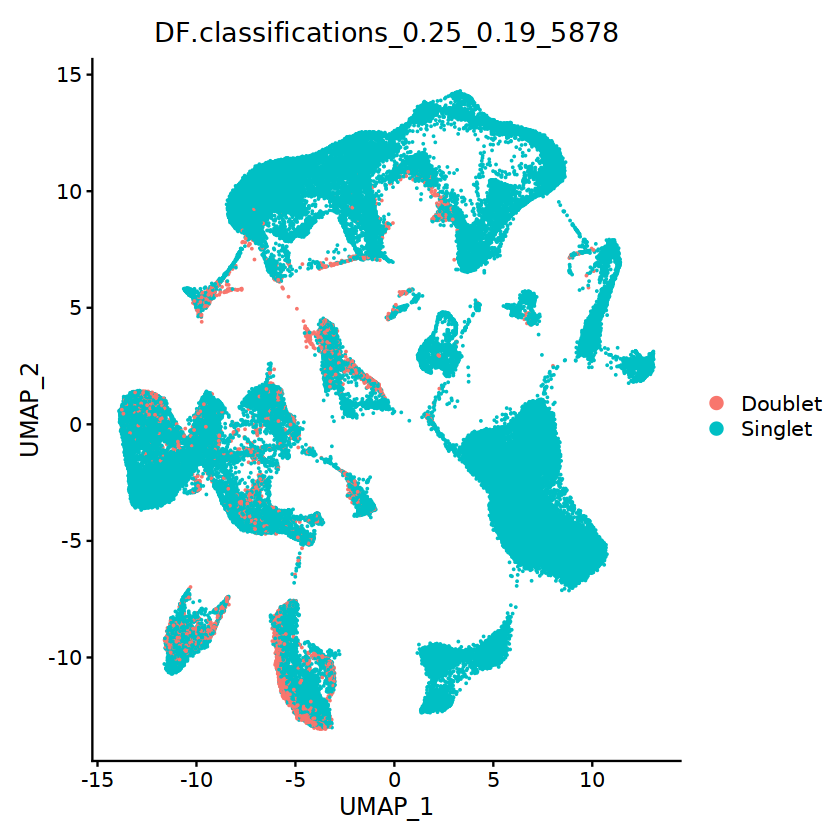

In [32]:
DimPlot(scRNA, reduction = "umap", group.by = "DF.classifications_0.25_0.19_5878")

In [33]:
ggsave('figure2.pdf',height =  4,width = 5)

In [34]:
immune.combined = subset(scRNA, subset = DF.classifications_0.25_0.19_5878  != 'Doublet')

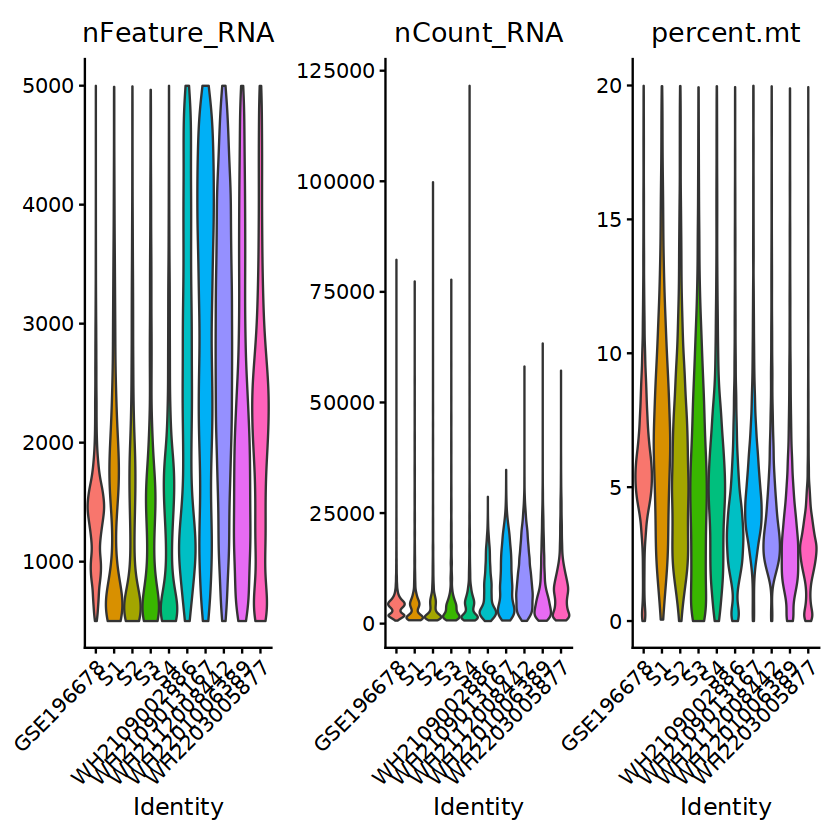

In [35]:
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 500 & nFeature_RNA < 5000 & percent.mt < 20)
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")
ggsave('figure1-1.pdf',height =  4,width = 9)

In [36]:
table(immune.combined$orig.ident)


   GSE196678           S1           S2           S3           S4 WH2109002886 
       28540         3644         6534         2465         4752        10007 
WH2109013167 WH2112008442 WH2201006389 WH2203005877 
        4997        10050         9475         7033 

In [ ]:
# ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")

# testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
# testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)

# DefaultAssay(testAB.integrated) <- "integrated"
# # Run the standard workflow for visualization and clustering
# testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
# testAB.integrated <- RunPCA(testAB.integrated, npcs = 50, verbose = FALSE)
# testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:30)
# testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.5)
# testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:30)
# testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:30)

# immune.combined = testAB.integrated

In [37]:
options(repr.plot.width = 18,repr.plot.height = 9
       )

In [49]:
#DimPlot(scRNA, reduction = "umap", split.by = "orig.ident",ncol = 4)

In [ ]:
library(harmony)

DefaultAssay(immune.combined) = 'RNA'

sceList <- SplitObject(immune.combined, split.by = "orig.ident")

single.ob=merge(sceList[[1]],sceList[2:length(sceList)])

DefaultAssay(single.ob) = 'RNA'

scRNA_harmony = single.ob

scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})

scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:20)

scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:20) %>% FindClusters(resolution =  0.3)
##作图
#group_by_cluster

options(repr.plot.width = 12,repr.plot.height = 8)

table(scRNA_harmony$orig.ident)

In [51]:
scRNA_harmony$group = ifelse(scRNA_harmony$orig.ident %in% c('GSE196678','S1','S2','S3','S4'),'control','OS')

In [56]:
options(repr.plot.width = 8,repr.plot.height = 6)

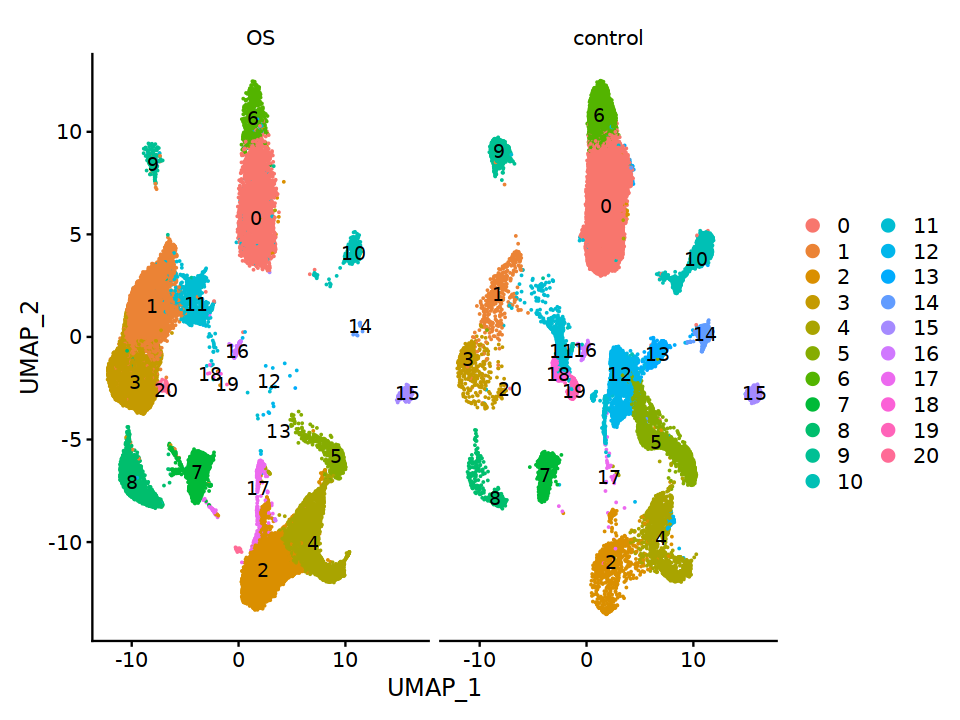

In [61]:
DimPlot(scRNA_harmony, reduction = "umap", split.by = "group",ncol = 2,label = T)

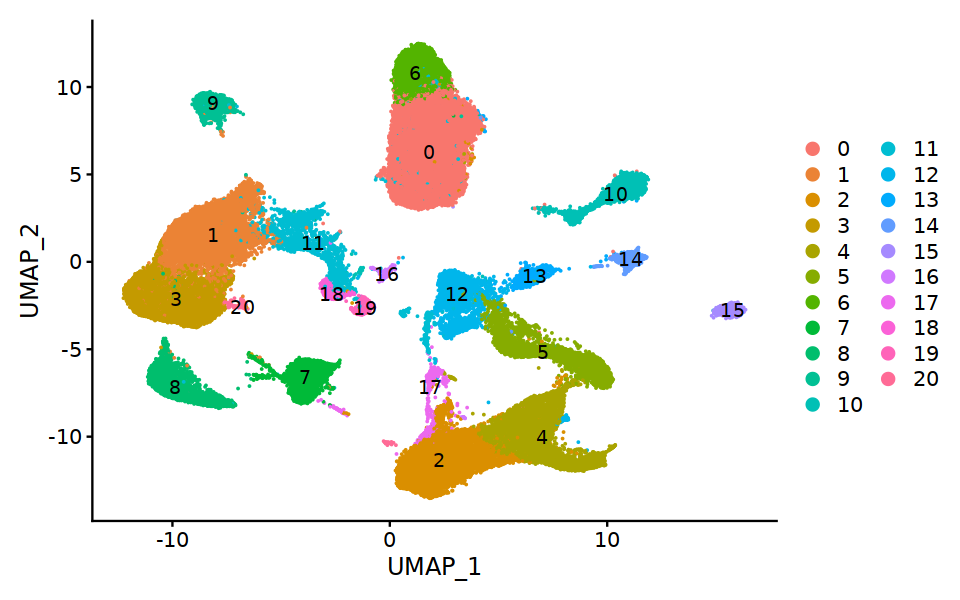

In [106]:
DimPlot(scRNA_harmony, reduction = "umap", label=T) 

In [168]:
immune.combined= readRDS('before_rename.rds')

In [172]:
DefaultAssay(immune.combined) = 'RNA'

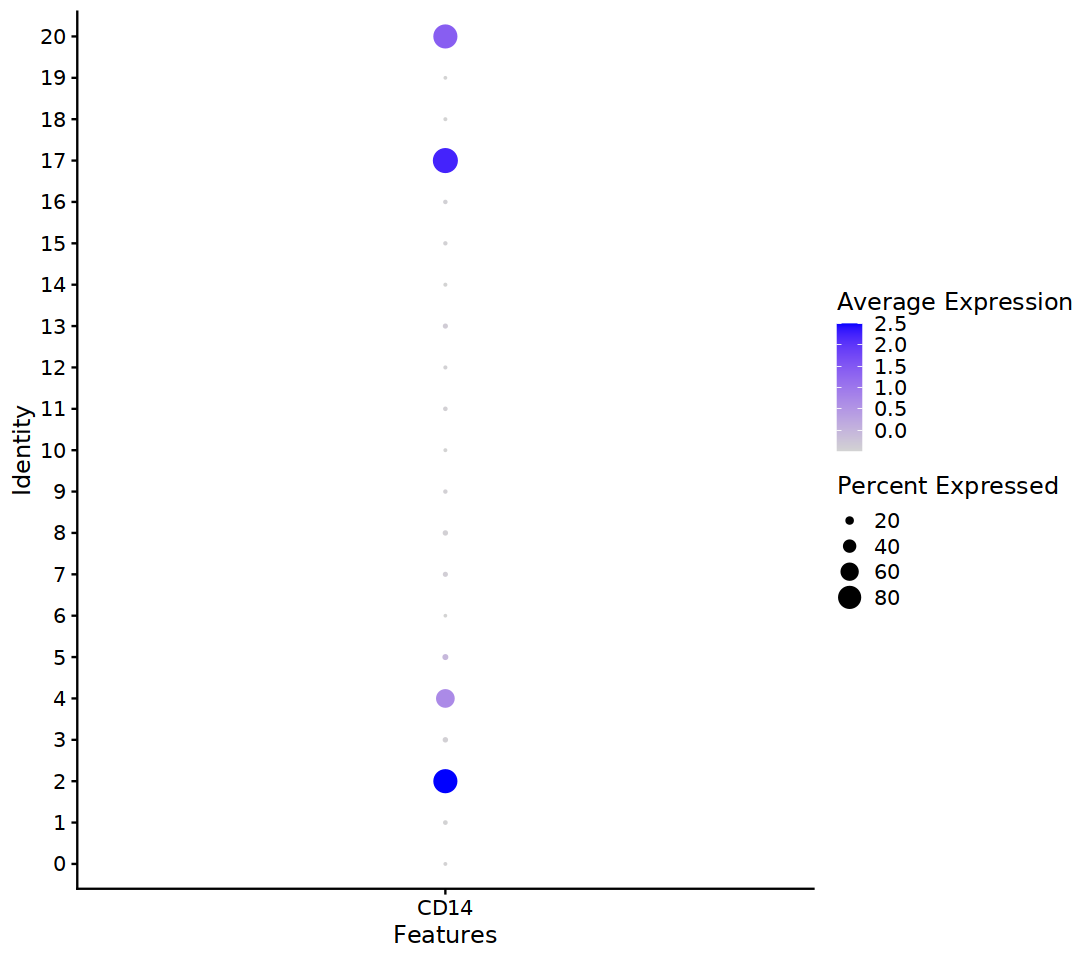

In [487]:
DotPlot(scRNA_harmony,features = c('CD14'))

In [62]:
Idents(scRNA_harmony) = 'seurat_clusters'
DefaultAssay(scRNA_harmony) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA_harmony, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20



In [64]:
write.csv(sce.markers,file = 'sce.markers.csv')

In [63]:
table(scRNA_harmony$orig.ident,scRNA_harmony$seurat_clusters)

              
                   0     1     2     3     4     5     6     7     8     9
  GSE196678    15340   232   623   353   548    26  4544   333   220  2833
  S1             461    16   121    27   188  1019    29    26     6     1
  S2            1132   120   133    96   394  2203    81    97    62    24
  S3             593    30    31    21   109   448    51    27     8    16
  S4            1497    34    10    60   210  1101   144    41    74    16
  WH2109002886  1622  1846  2493  1230   739    31   160   105   215    33
  WH2109013167   610  1975   708   527   250     1    43   288   212    24
  WH2112008442   451  2405  1588  2792   458    13    78   397  1329    16
  WH2201006389   632  2204  1073  1164   270     8    55  2559   744   146
  WH2203005877   581   185  1472   316  2583   699   126    79   567     0
              
                  10    11    12    13    14    15    16    17    18    19
  GSE196678     1032   102    21  1650   233   413    19    12     2  

In [488]:
immune.combined = scRNA_harmony

In [66]:
saveRDS(immune.combined,file = 'before_rename.rds')

In [489]:
ggsave('figure3.pdf',height =  4,width = 5)

In [490]:
ggsave('figure4.pdf',height =  8,width = 12)

In [5]:
immune.combined = readRDS('before_rename.rds')

In [181]:
scRNA = immune.combined

In [182]:
library(dplyr)

In [ ]:
library(Seurat) ##
library(SingleR)
library(ggplot2)
library(reshape2)
mouseImmu  = get(load('/import/DB/SingleR_ref/ref_Human_all.RData'))

pbmc_for_SingleR <- GetAssayData(scRNA, slot="data") ##获取标准化矩阵
clusters=scRNA@meta.data$seurat_clusters

pred.mouseImmu <- SingleR(test = pbmc_for_SingleR, ref = mouseImmu, labels = mouseImmu$label.main,
 method = "cluster", clusters = clusters, 
 assay.type.test = "logcounts", assay.type.ref = "logcounts")
celltype = data.frame(ClusterID=rownames(pred.mouseImmu), celltype=pred.mouseImmu$labels, stringsAsFactors = FALSE)

In [186]:
celltype$celltype

[1] "T_cells"           "Chondrocytes"      "Macrophage"       
 [4] "Chondrocytes"      "Monocyte"          "Neutrophils"      
 [7] "NK_cell"           "Endothelial_cells" "Tissue_stem_cells"
[10] "NK_cell"           "B_cell"            "MSC"              
[13] "Pro-Myelocyte"     "NK_cell"           "B_cell"           
[16] "Monocyte"          "CMP"               "Monocyte"         
[19] "Erythroblast"      "BM"                "Chondrocytes"

In [187]:
DefaultAssay(scRNA)  ='RNA'

In [188]:
celltype$celltype = c('T/NK','Mesenchyme/osteoclast',
                      'Myeloid','Mesenchyme/osteoclast','Myeloid',
                      'Neutrophils','T/NK',
                      'Endo','Mesenchyme/osteoclast',
                      'Mesenchyme/osteoclast','B',
                      'Mesenchyme/osteoclast','Neutrophils',
                      'B','B',
                      'B','Mast',
                      'Myeloid','Mesenchyme/osteoclast',
                      'Mesenchyme/osteoclast','Neutrophils')

In [189]:
scRNA@meta.data$celltype = "NA"
# 赋值
for(i in 1:nrow(celltype)){
  scRNA@meta.data[which(scRNA@meta.data$seurat_clusters == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}

In [190]:
Idents(scRNA) = 'seurat_clusters'

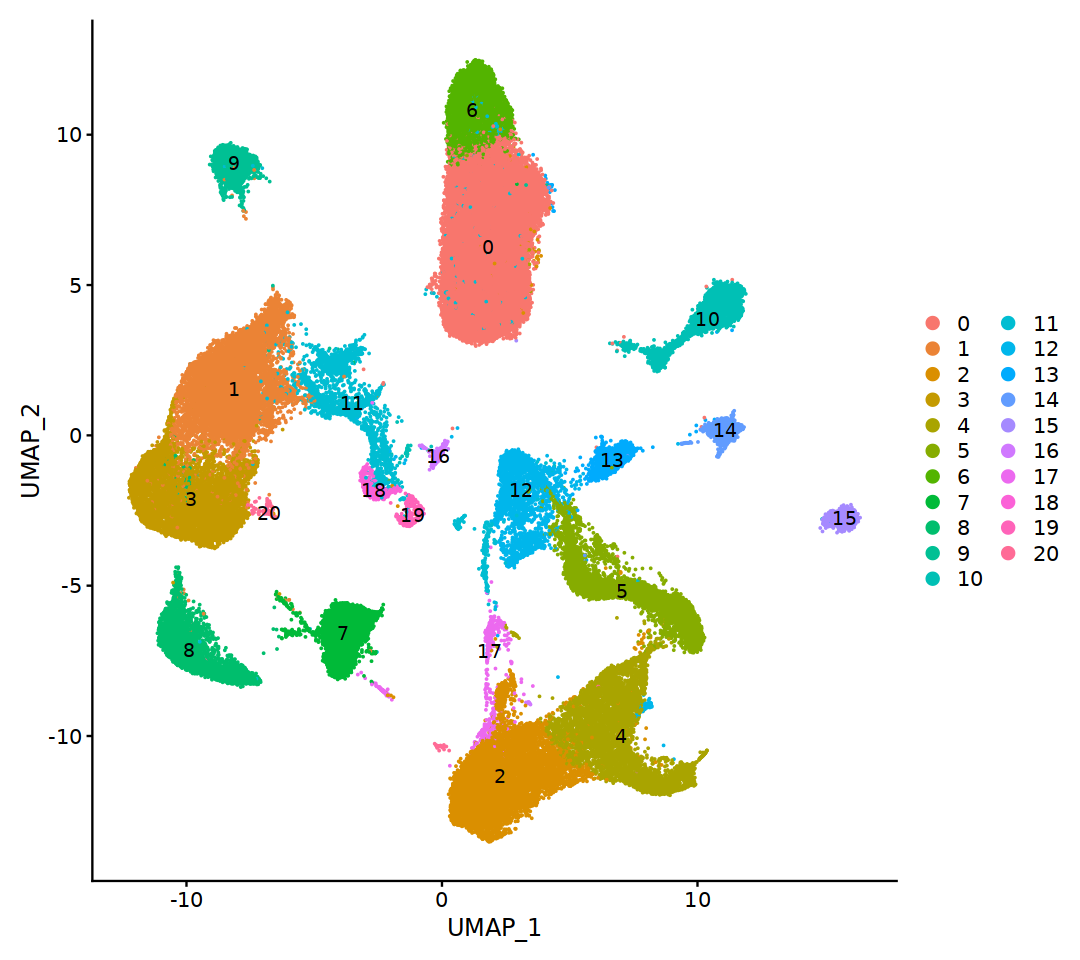

In [191]:
DimPlot(immune.combined, reduction = "umap", label=T) 

In [192]:
library(Seurat)

In [193]:
options(repr.plot.width = 8,repr.plot.height = 5)

In [194]:
table(scRNA$seurat_clusters)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
22919  9047  8252  6586  5749  5549  5311  3952  3437  3109  2734  2637  2550 
   13    14    15    16    17    18    19    20 
 1678   993   959   541   537   470   345   142 

In [195]:
DefaultAssay(scRNA) = 'RNA'

In [196]:
data = scRNA@meta.data 

In [197]:
data$barcode = rownames(data)

In [198]:
library(dplyr)

In [199]:
part1 = data %>% dplyr::filter(orig.ident == 'GSE196678')

In [200]:
part2 = data %>% dplyr::filter(orig.ident != 'GSE196678')

In [201]:
library("stringr")  
anno2 = part1 %>%  mutate(
    sample = case_when(
        str_sub(barcode, - 4, - 1) == '-1_1' ~'C1',
        str_sub(barcode, - 4, - 1) == '-2_1' ~'C2',
        str_sub(barcode, - 4, - 1) == '-3_1' ~'C3',
        str_sub(barcode, - 4, - 1) == '-4_1' ~'C4',
        .default = orig.ident

    )
  )

In [202]:
part2$sample = part2$orig.ident

In [203]:
anno3  = rbind(part2,anno2)

In [204]:
scRNA2 = AddMetaData(scRNA,metadata = anno3)

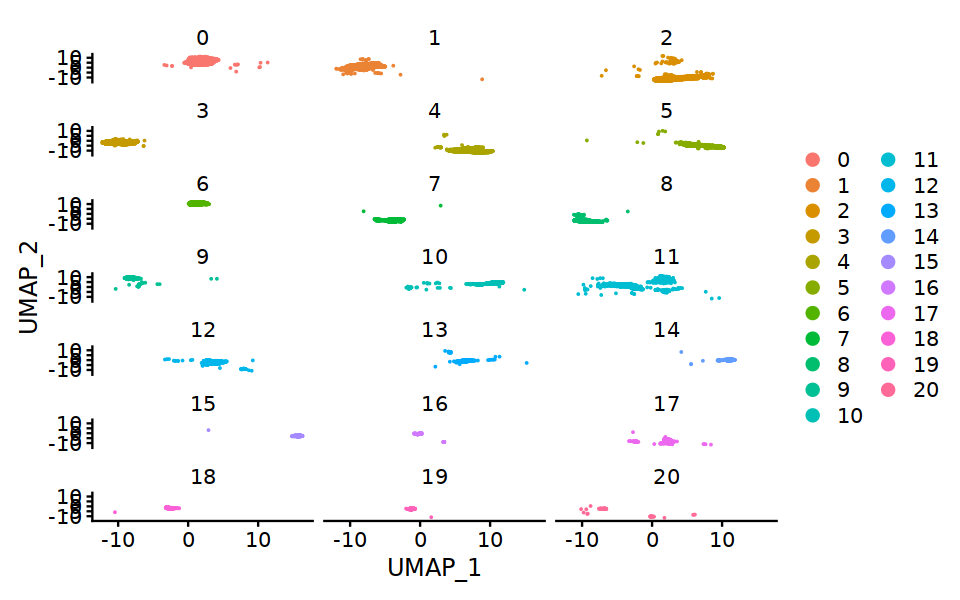

In [205]:
DimPlot(scRNA2,split.by = 'seurat_clusters',ncol = 3)

In [206]:
scRNA2$orig.ident = scRNA2$sample

In [207]:
table(scRNA2$sample)


          C1           C2           C3           C4           S1           S2 
        6409         6746         7611         7774         3644         6534 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
        2465         4752        10007         4997        10050         9475 
WH2203005877 
        7033 

In [208]:
saveRDS(scRNA2,file = 'scRNA.rename.rds')

In [209]:
scRNA = scRNA2

In [210]:
options(repr.plot.width =9 ,repr.plot.height = 9)

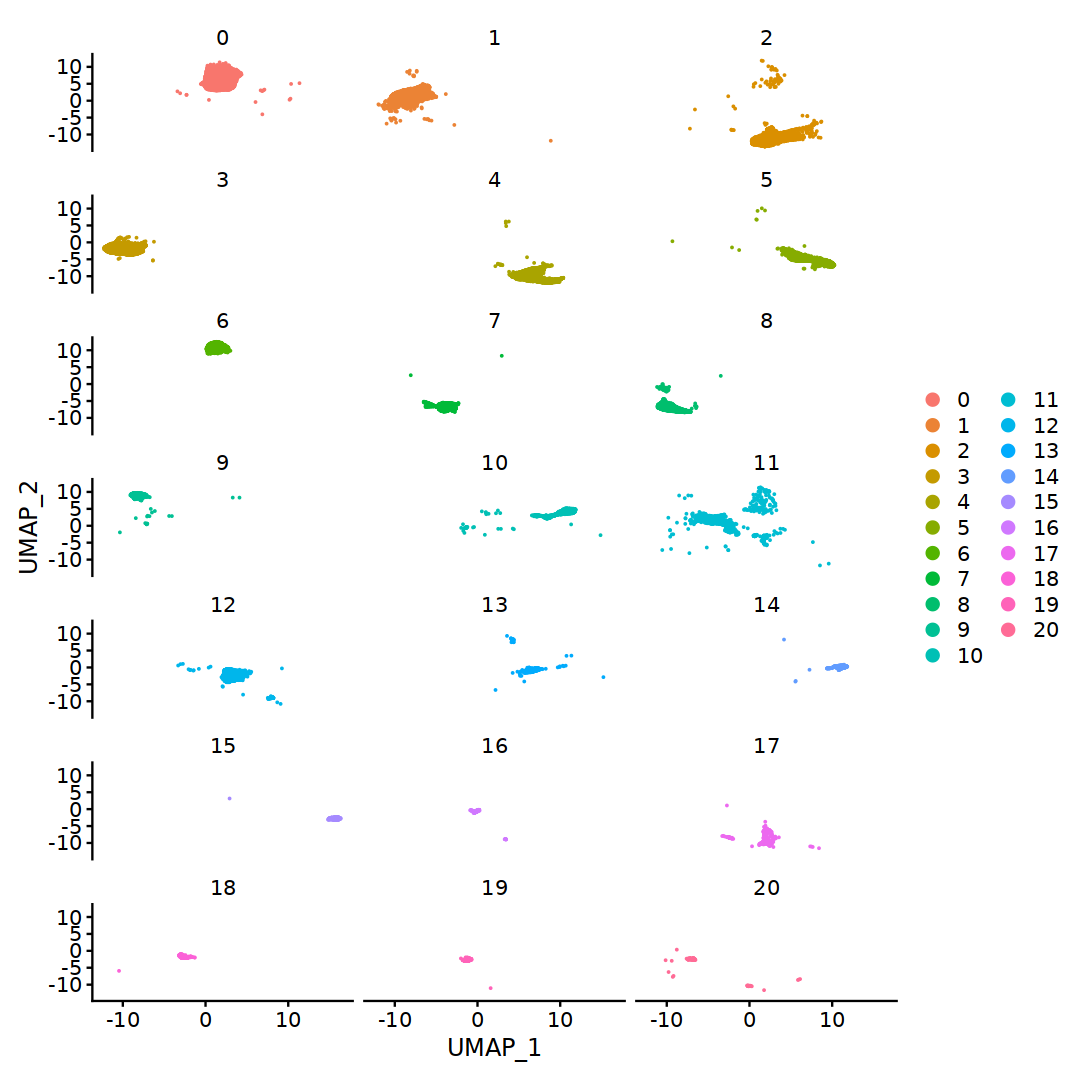

In [211]:
DimPlot(scRNA,split.by = 'seurat_clusters',ncol = 3)

In [212]:
Idents(scRNA) = 'celltype'
DefaultAssay(scRNA) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster T/NK

Calculating cluster B

Calculating cluster Mesenchyme/osteoclast

Calculating cluster Neutrophils

Calculating cluster Myeloid

Calculating cluster Endo

Calculating cluster Mast



In [213]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)

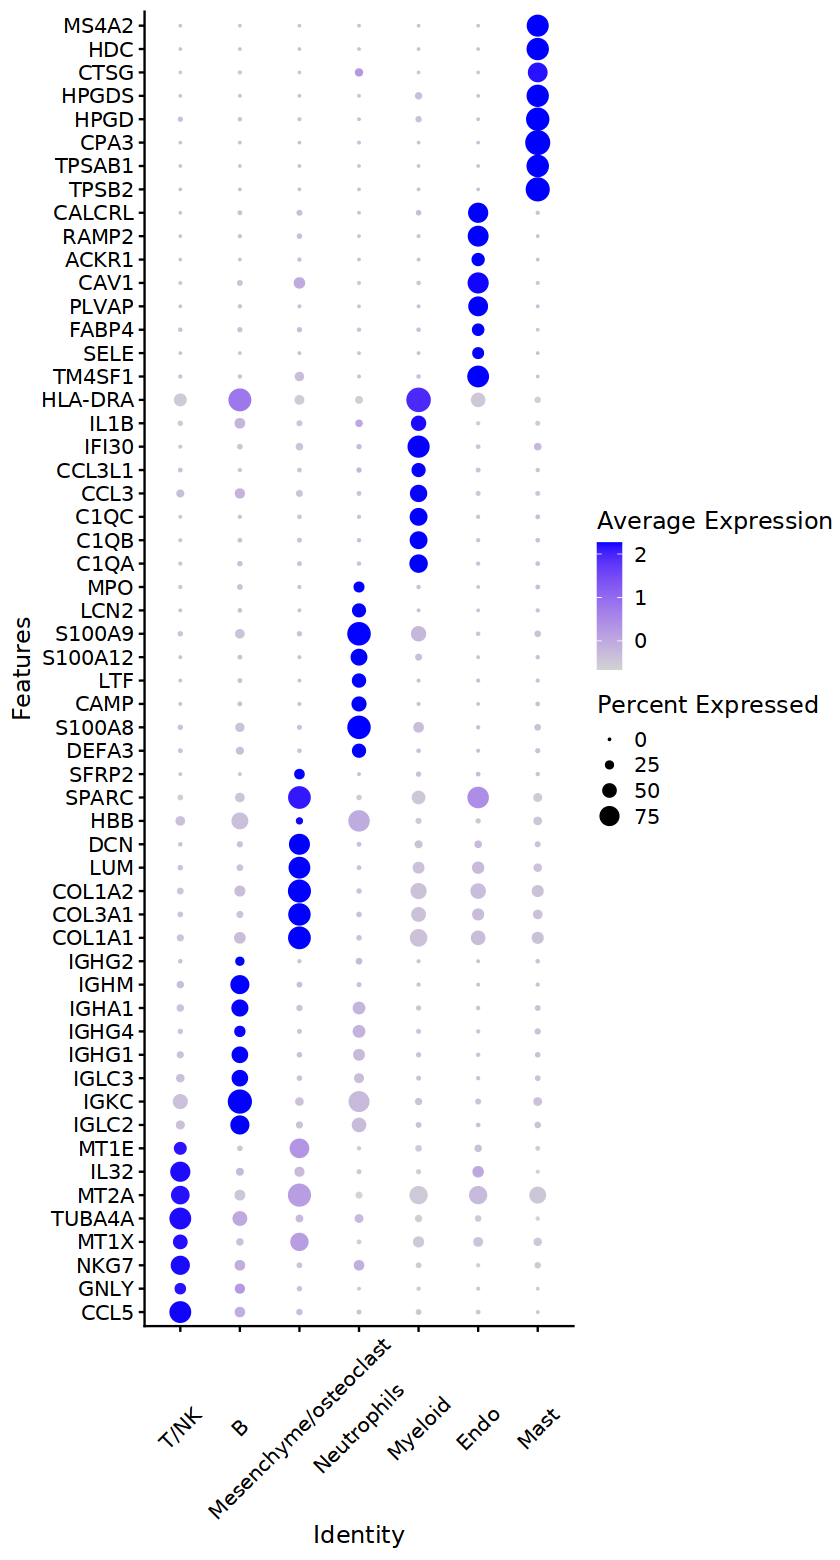

In [214]:
options(repr.plot.height = 13,repr.plot.width = 7)

 DotPlot(scRNA, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [215]:
write.csv(sce.markers,file = 'celltype.sce.markers.csv')

In [216]:
scedata = scRNA

In [217]:
scedata$orig.ident = scedata$sample

In [218]:
Idents(scedata) = 'celltype'

In [219]:
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数


          C1           C2           C3           C4           S1           S2 
        6409         6746         7611         7774         3644         6534 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
        2465         4752        10007         4997        10050         9475 
WH2203005877 
        7033 


                 T/NK                     B Mesenchyme/osteoclast 
          0.322639633           0.072733922           0.292935758 
          Neutrophils               Myeloid                  Endo 
          0.094186086           0.166154268           0.045167263 
                 Mast 
          0.006183069 

                       
                          C1   C2   C3   C4   S1   S2   S3   S4 WH2109002886
  T/NK                  4278 4412 7131 4063  490 1213  644 1641         1782
  B                     1099 1721  194  314  957  792  239  404          283
  Mesenchyme/osteoclast  319  256   91 3080  428  786  366  613         4249
  Neutrophils             14   18   14    1 1426 3066 1008 1781           59
  Myeloid                641  290   66  186  309  537  149  224         3475
  Endo                    54   36  115  128   26   97   27   41          105
  Mast                     4   13    0    2    8   43   32   48           54
                       
                        WH2109013167 WH2112008442 WH2201006389 WH2203005877
  T/NK                           653          529          687          707
  B                               24           54           18          265
  Mesenchyme/osteoclast         2911         6683         4680         1169
  Neutrophils                   

In [220]:
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- data.frame(Cellratio)

In [221]:
library(reshape2)
cellper <- dcast(Cellratio,Var2~Var1, value.var = "Freq")#长数据转为宽数据
rownames(cellper) <- cellper[,1]
cellper <- cellper[,-1]

In [222]:
sample <- rownames(cellper)

In [223]:
sample

[1] "C1"           "C2"           "C3"           "C4"           "S1"          
 [6] "S2"           "S3"           "S4"           "WH2109002886" "WH2109013167"
[11] "WH2112008442" "WH2201006389" "WH2203005877"

In [224]:
group <- c(rep('Con',8),rep('OS',5))


samples <- data.frame(sample, group)#创建数据框

rownames(samples)=samples$sample
cellper$sample <- samples[rownames(cellper),'sample']#R添加列
cellper$group <- samples[rownames(cellper),'group']#R添加列

###作图展示
pplist = list()
sce_groups = unique(scRNA$celltype)


In [225]:
library(ggplot2)
library(dplyr)
library(ggpubr)
library(cowplot)
for(group_ in sce_groups){
  cellper_  = cellper %>% select(one_of(c('sample','group',group_)))#选择一组数据
  colnames(cellper_) = c('sample','group','percent')#对选择数据列命名
  cellper_$percent = as.numeric(cellper_$percent)#数值型数据
  cellper_ <- cellper_ %>% group_by(group) %>% mutate(upper =  quantile(percent, 0.75), 
                                                      lower = quantile(percent, 0.25),
                                                      mean = mean(percent),
                                                      median = median(percent))#上下分位数
# print(group_)
print(cellper_$median)
      pp1 = ggplot(cellper_,aes(x=group,y=percent)) + #ggplot作图
    geom_jitter(shape = 21,aes(fill=group),width = 0.25) + 
    stat_summary(fun=mean, geom="point", color="grey60") +
    theme_cowplot() +
    theme(axis.text = element_text(size = 10),axis.title = element_text(size = 10),legend.text = element_text(size = 10),
          legend.title = element_text(size = 10),plot.title = element_text(size = 10,face = 'plain'),legend.position = 'none') + 
    labs(title = group_,y='Percentage') +
    geom_errorbar(aes(ymin = lower, ymax = upper),col = "grey60",width =  1)
  
  ###组间t检验分析
  labely = max(cellper_$percent)
  compare_means(percent ~ group,  data = cellper_)
  my_comparisons <- list( c("Con", "OS") )
  pp1 = pp1 + stat_compare_means(comparisons = my_comparisons,size = 3,method = "t.test")
  pplist[[group_]] = pp1
}
  

 [1] 0.4339839 0.4339839 0.4339839 0.4339839 0.4339839 0.4339839 0.4339839
 [8] 0.4339839 0.1005261 0.1005261 0.1005261 0.1005261 0.1005261
 [1] 0.109084762 0.109084762 0.109084762 0.109084762 0.109084762 0.109084762
 [7] 0.109084762 0.109084762 0.005373134 0.005373134 0.005373134 0.005373134
[13] 0.005373134
 [1] 0.1188736 0.1188736 0.1188736 0.1188736 0.1188736 0.1188736 0.1188736
 [8] 0.1188736 0.4939314 0.4939314 0.4939314 0.4939314 0.4939314
 [1] 0.188728905 0.188728905 0.188728905 0.188728905 0.188728905 0.188728905
 [7] 0.188728905 0.188728905 0.005895873 0.005895873 0.005895873 0.005895873
[13] 0.005895873
 [1] 0.05379215 0.05379215 0.05379215 0.05379215 0.05379215 0.05379215
 [7] 0.05379215 0.05379215 0.21422886 0.21422886 0.21422886 0.21422886
[13] 0.21422886
 [1] 0.009790646 0.009790646 0.009790646 0.009790646 0.009790646 0.009790646
 [7] 0.009790646 0.009790646 0.039502488 0.039502488 0.039502488 0.039502488
[13] 0.039502488
 [1] 0.002061229 0.002061229 0.002061229 0.002061

In [226]:
options(repr.plot.height = 8,repr.plot.width = 9)

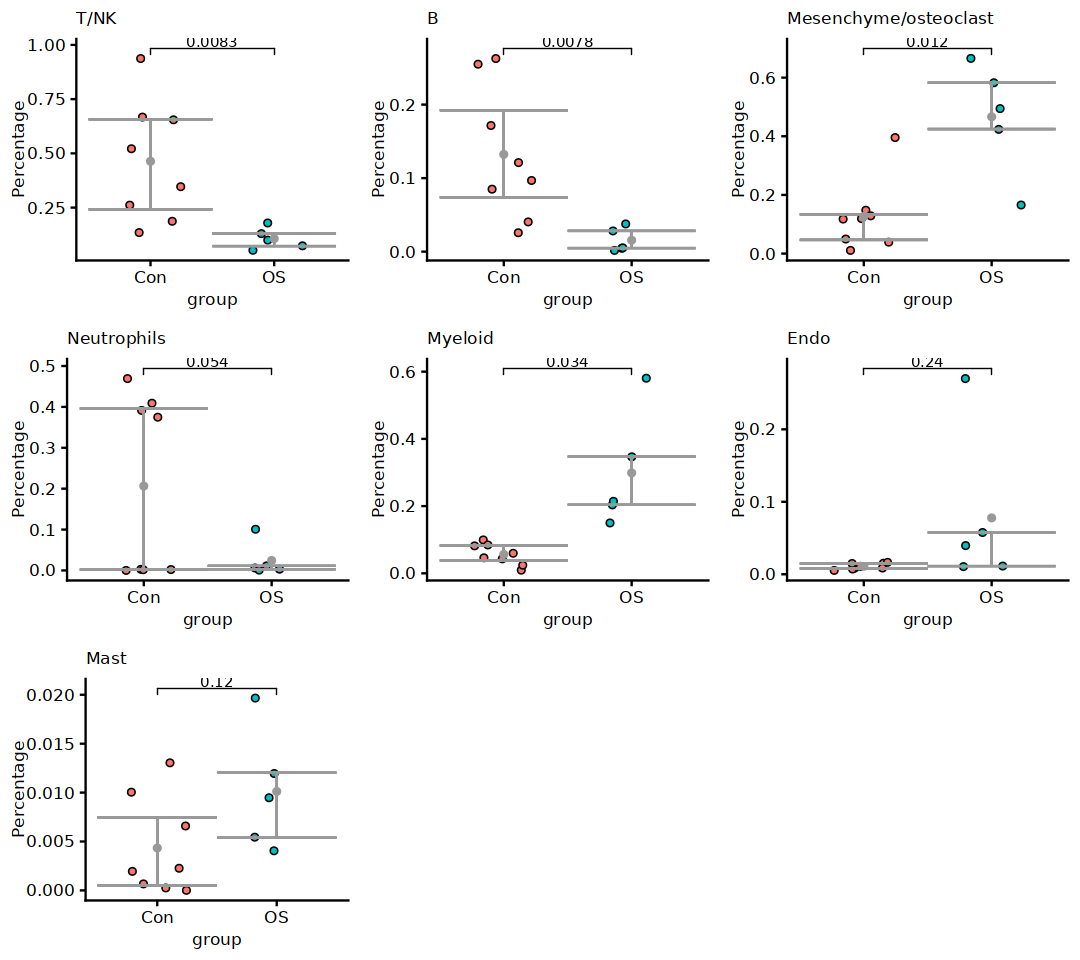

In [227]:
 library(cowplot)
plot_grid(pplist[[1]],
          pplist[[2]],
          pplist[[3]],
          pplist[[4]],
          pplist[[5]],
          pplist[[6]],
          pplist[[7]])


          C1           C2           C3           C4           S1           S2 
        6409         6746         7611         7774         3644         6534 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
        2465         4752        10007         4997        10050         9475 
WH2203005877 
        7033 


                 T/NK                     B Mesenchyme/osteoclast 
          0.322639633           0.072733922           0.292935758 
          Neutrophils               Myeloid                  Endo 
          0.094186086           0.166154268           0.045167263 
                 Mast 
          0.006183069 

                       
                           OS control
  T/NK                   4358   23872
  B                       644    5720
  Mesenchyme/osteoclast 19692    5939
  Neutrophils             913    7328
  Myeloid               12136    2402
  Endo                   3428     524
  Mast                    391     150

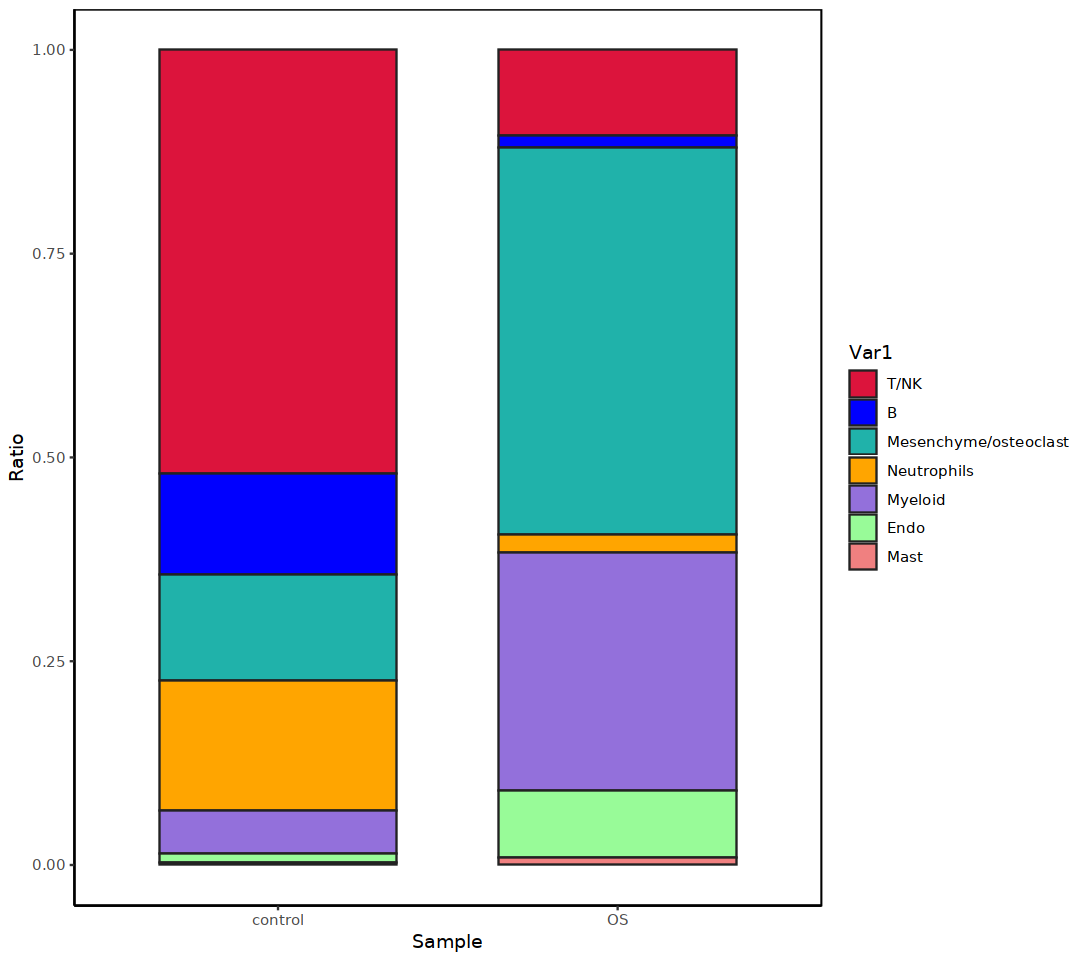

In [228]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$group)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$group), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('control','OS'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

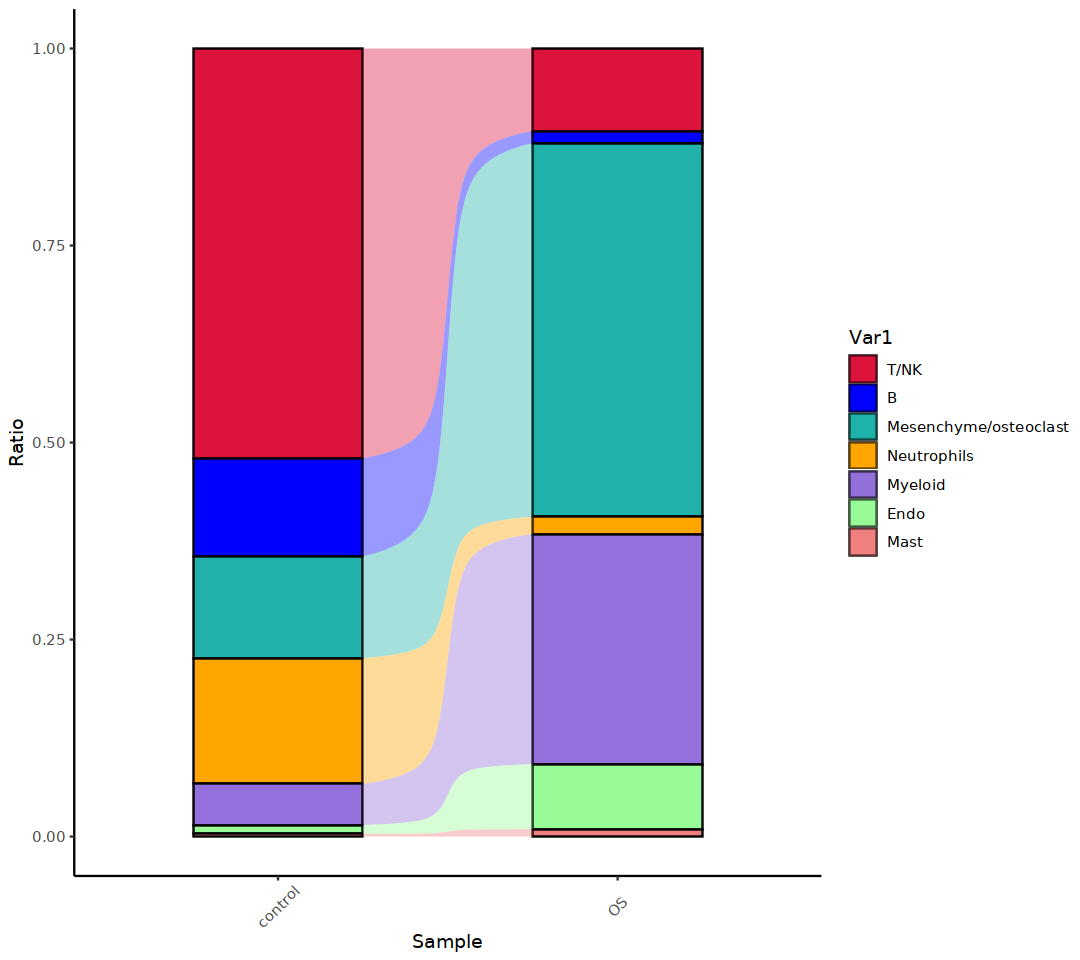

In [229]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [230]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)

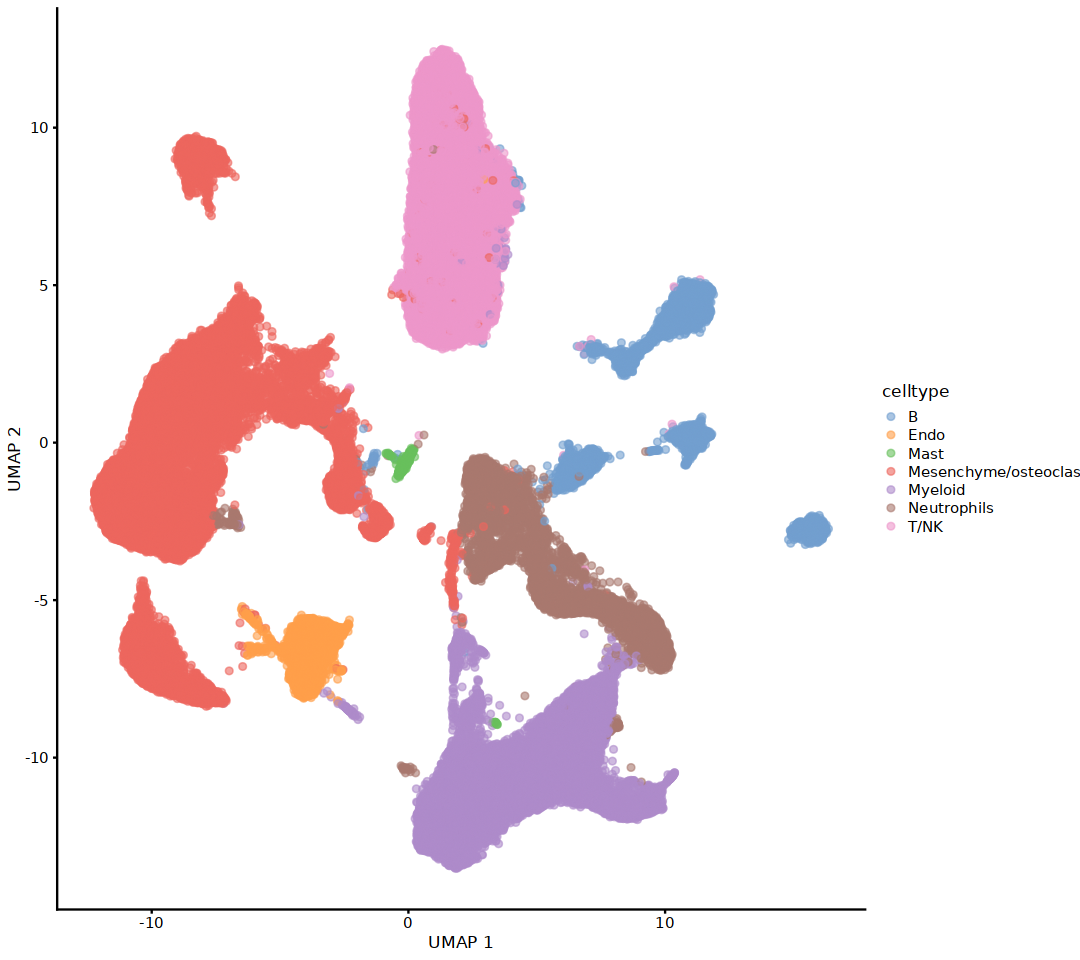

In [231]:
sce <- as.SingleCellExperiment(scedata)
 
#Visualize the data
plotReducedDim(sce, colour_by="celltype", dimred = "UMAP") 

Constructing kNN graph with k:20

Checking valid object

Running refined sampling with reduced_dim

Checking meta.data validity

Counting cells in neighbourhoods

  [[ suppressing 13 column names 'C1', 'C2', 'C3' ... ]]



6 x 13 sparse Matrix of class "dgCMatrix"
                                 
1 . . 69   . .  . . . . . .  .  .
2 . .  .   . .  . . . . . . 40  .
3 . .  .   . .  . . . . . 1  . 41
4 . .  . 111 .  . . . . . .  .  .
5 . .  .   . 1 34 . 1 . . .  .  .
6 . .  .   . 2  8 8 5 . . .  .  .

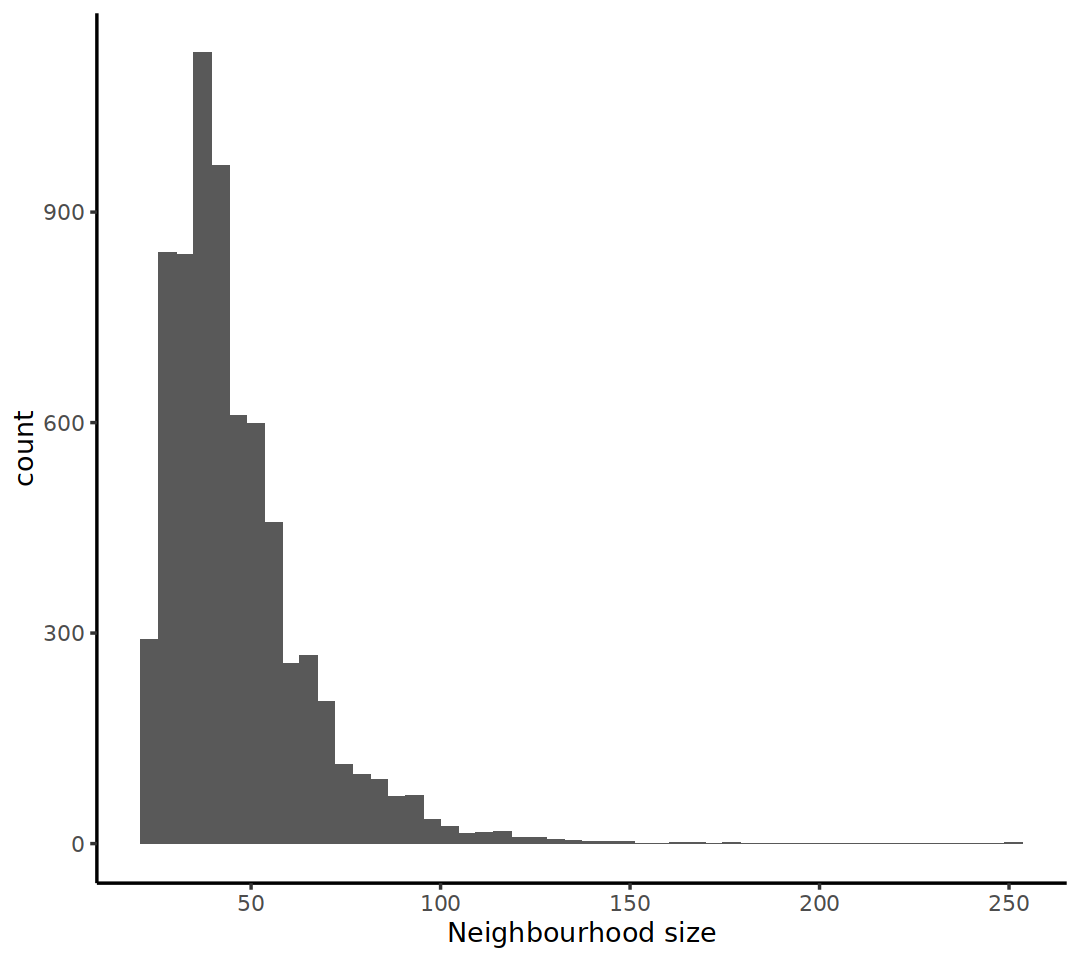

In [232]:
scmilo <- Milo(sce)
 
#Construct KNN graph
scmilo <- buildGraph(scmilo, k = 20, d = 20,reduced.dim = "PCA")
 
#Defining representative neighbourhoods on the KNN graph
set.seed(10)
scmilo <- makeNhoods(scmilo, prop = 0.1,
                     k = 20, d = 20, 
                     refined = TRUE, reduced_dims = "PCA")
plotNhoodSizeHist(scmilo)
 
#Counting cells in neighbourhoods
scmilo <- countCells(scmilo, 
                     meta.data = as.data.frame(colData(scmilo)), 
                     sample = "sample")
head(nhoodCounts(scmilo))

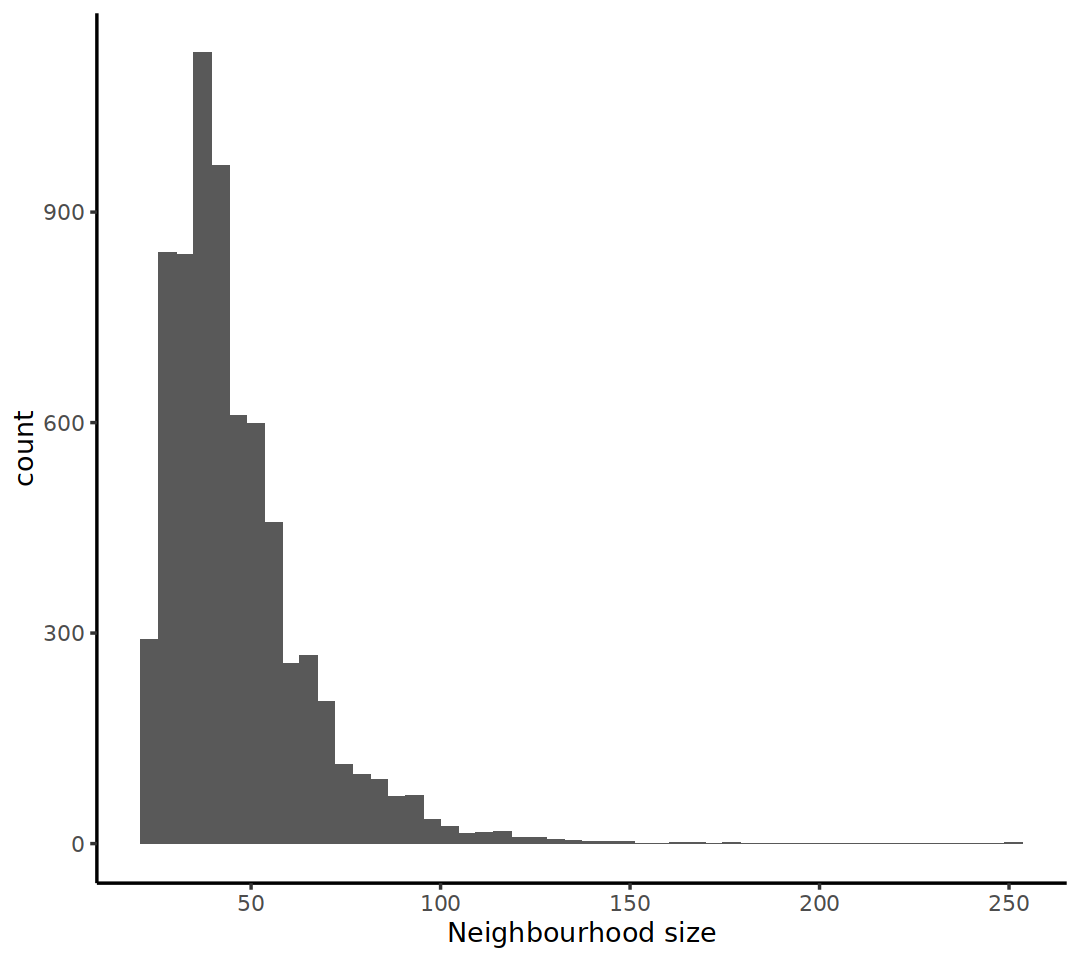

In [233]:
plotNhoodSizeHist(scmilo)

In [234]:
sc_design <- data.frame(colData(scmilo))[,c("sample", "group")]

In [235]:
sc_design <- distinct(sc_design)
rownames(sc_design) <- sc_design$sample

In [236]:
sc_design <- sc_design[colnames(nhoodCounts(scmilo)), , drop=FALSE]
table(sc_design$group)


     OS control 
      5       8 

In [237]:

#odDistance(scmilo, d = 20, reduced.dim = "PCA")

In [238]:
rownames(sc_design) <- sc_design$sample

In [239]:
sc_design$control = c(rep(1,4),rep(0,5),rep(1,4))
sc_design$OS = c(rep(0,4),rep(1,5),rep(0,4))

In [240]:
sc_design$control  = as.factor(sc_design$control )

In [241]:
sc_design$OS = as.factor(sc_design$OS )

In [242]:
model <- model.matrix(~ 0+group, data=sc_design)

In [243]:
model

,groupOS,groupcontrol
C1,0,1
C2,0,1
C3,0,1
C4,0,1
S1,0,1
S2,0,1
S3,0,1
S4,0,1
WH2109002886,1,0
WH2109013167,1,0


In [244]:
contrast.1 <- c("groupOS -  groupcontrol") # the syntax is <VariableName><ConditionLevel> - <VariableName><ControlLevel>

In [245]:
# we need to use the ~ 0 + Variable expression here so that we have all of the levels of our variable as separate columns in our model matrix
results <- testNhoods(scmilo, design = ~0 + group, design.df = sc_design, model.contrasts = contrast.1,
                         fdr.weighting="graph-overlap", norm.method="TMM")
table(results$SpatialFDR < 0.1)

Using TMM normalisation

Performing spatial FDR correction withgraph-overlap weighting




FALSE  TRUE 
  707  6337 

In [246]:
results %>%
  arrange(SpatialFDR) %>%
  head() 

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,6.152371,7.565857,10.33618,0.001305010,0.004428572,2,0.003823336
3,6.385592,7.717526,10.38110,0.001273644,0.004428572,3,0.003823336
7,6.283595,7.649538,10.29683,0.001333131,0.004428572,7,0.003823336
11,6.646552,7.898182,10.26415,0.001356948,0.004428572,11,0.003823336
17,7.319467,8.409100,10.01285,0.001555120,0.004428572,17,0.003823336
19,6.619747,7.876383,10.29612,0.001333644,0.004428572,19,0.003823336


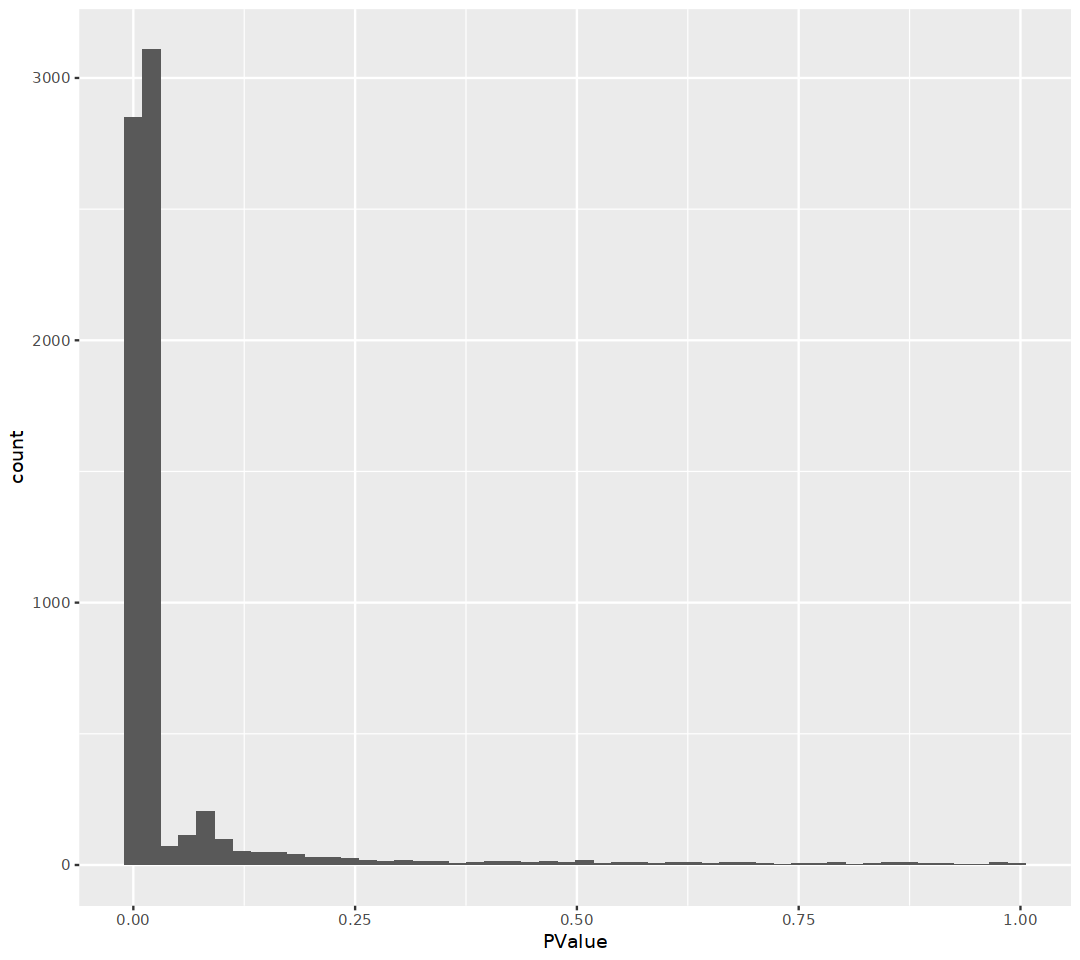

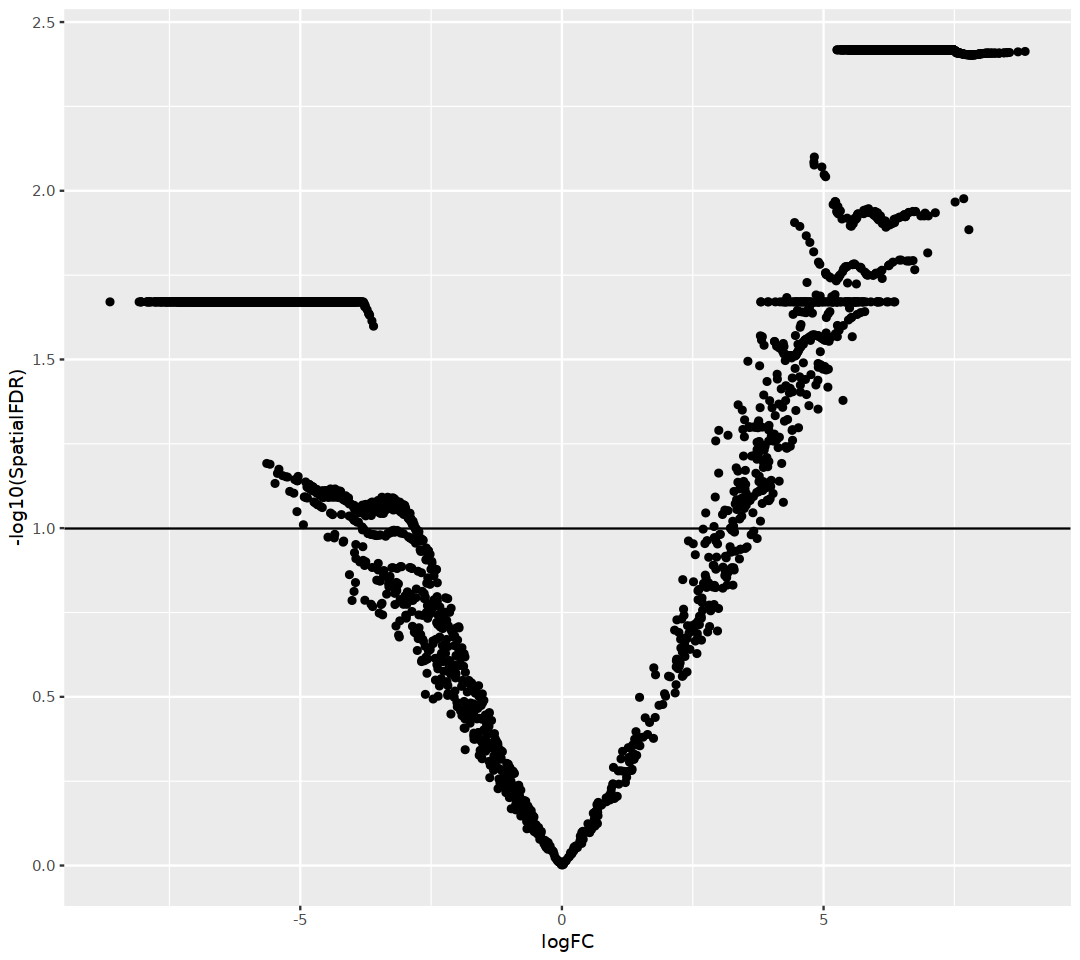

In [247]:
ggplot(results, aes(PValue)) + geom_histogram(bins=50)
ggplot(results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) 

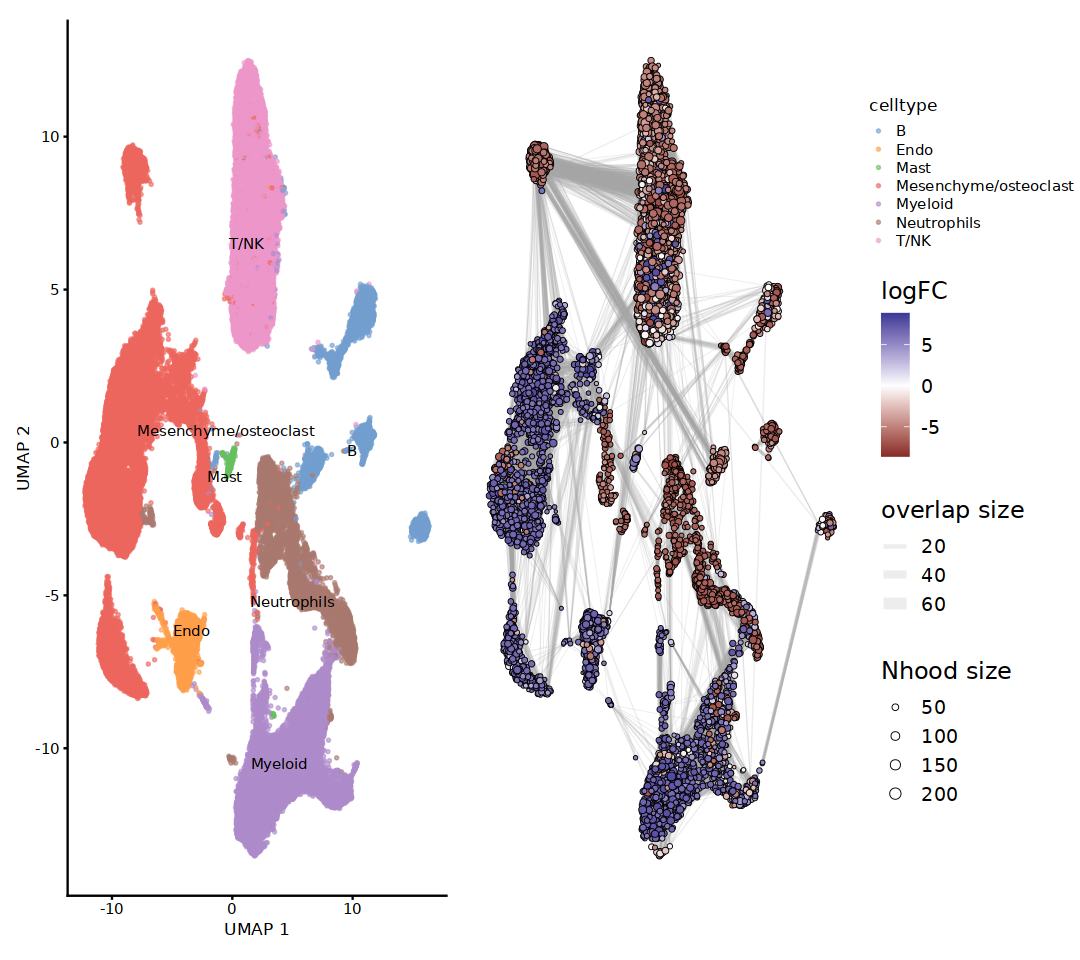

In [248]:
scmilo <- buildNhoodGraph(scmilo)
 
## Plot single-cell UMAP
umap_pl <- plotReducedDim(scmilo, dimred = "UMAP", 
                          colour_by="celltype", text_by = "celltype", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")
 
## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(scmilo, results, layout="UMAP",alpha = 1) 
 
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [249]:
results <- annotateNhoods(scmilo, results, coldata_col = "celltype")

Converting celltype to factor...



In [250]:
table(results$celltype)


                    B                  Endo                  Mast 
                  463                   321                    35 
Mesenchyme/osteoclast               Myeloid           Neutrophils 
                 2088                  1219                   656 
                 T/NK 
                 2262 

In [251]:
# https://rdrr.io/github/MarioniLab/miloR/f/vignettes/milo_contrasts.Rmd

Converting group.by to factor...



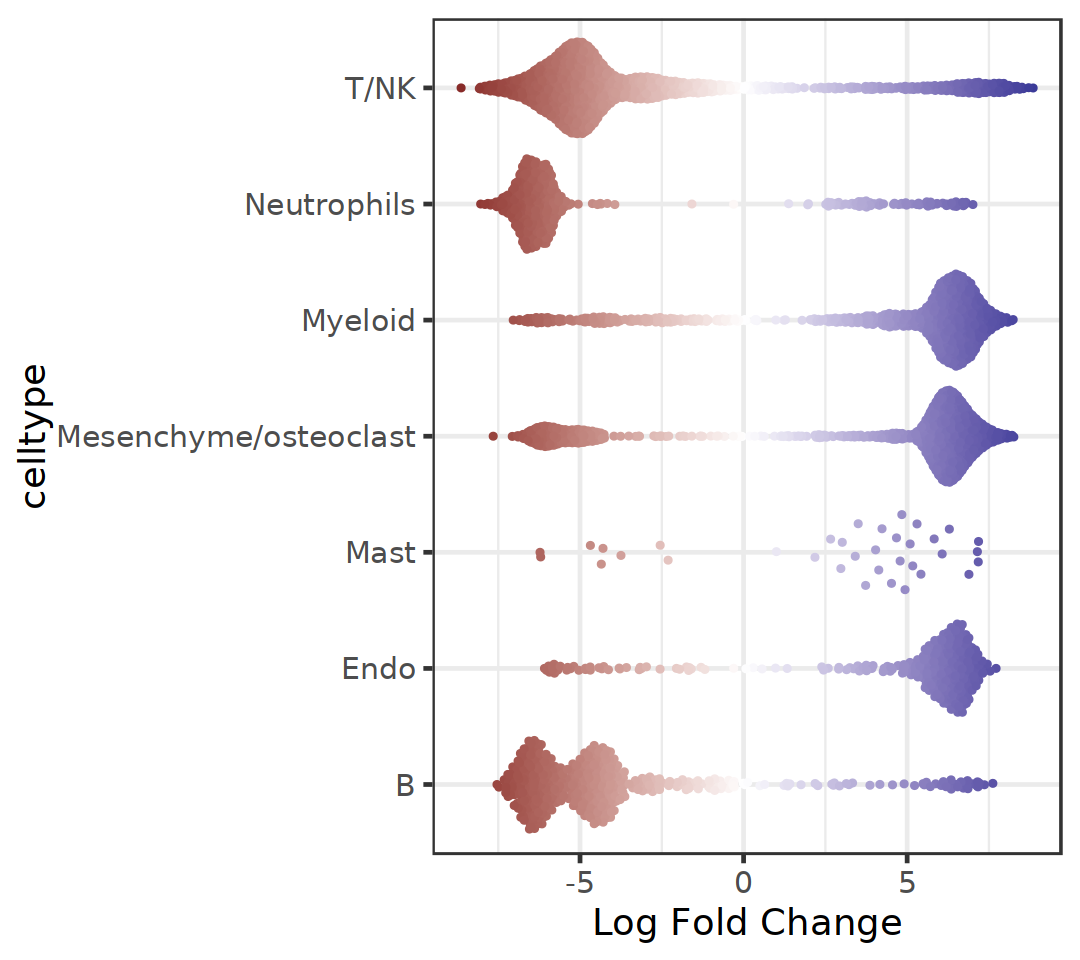

In [252]:
plotDAbeeswarm(results, group.by = "celltype",alpha = 1)

In [253]:
DefaultAssay(scRNA) ='RNA'

In [254]:
Idents(scRNA) = 'celltype'

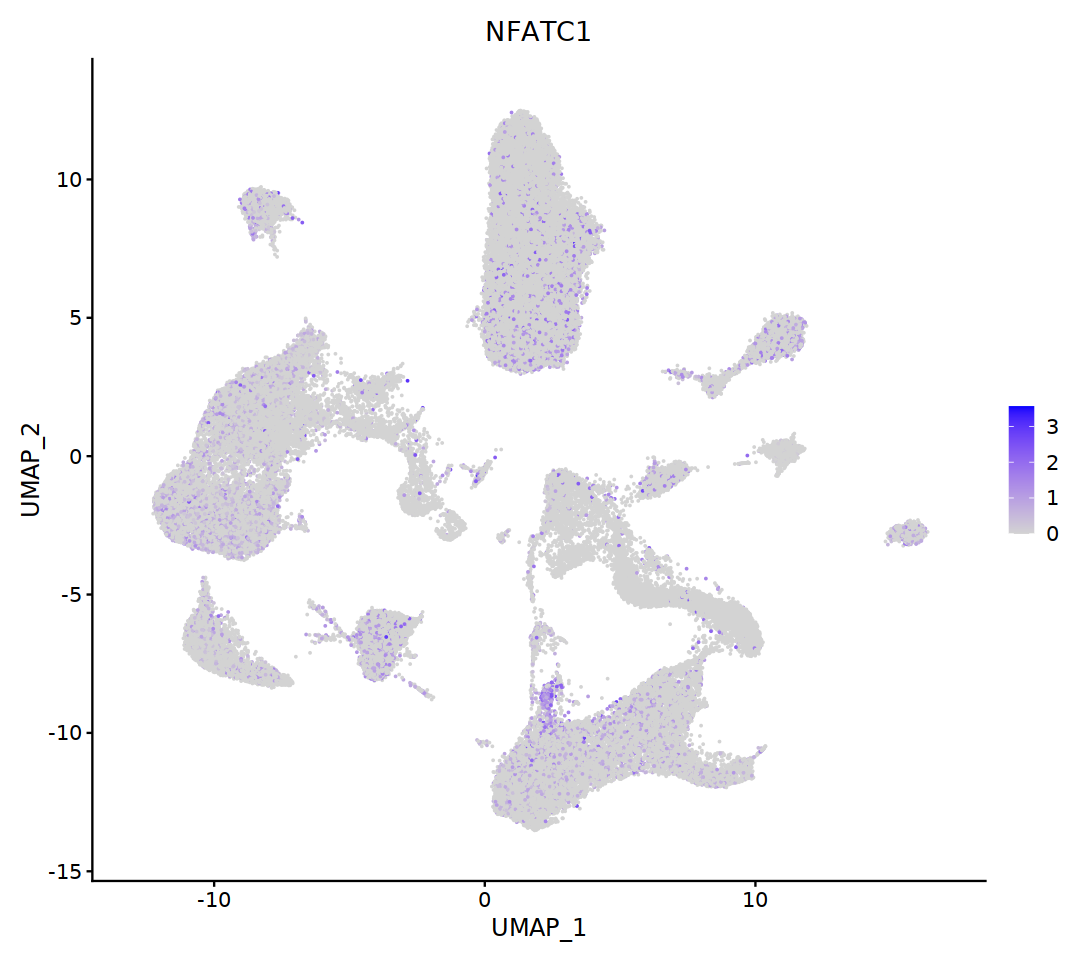

In [256]:
FeaturePlot(scRNA,features = 'NFATC1')

In [ ]:
DefaultAssay(scRNA) = 'RNA'

In [ ]:
Idents(scRNA) = 'seurat_clusters'

In [ ]:
DotPlot(scRNA,features = 'TBC1D16',split.by = 'group')

In [ ]:
Idents(scRNA) = 'group'

In [ ]:
FeaturePlot(scRNA,features = 'TBC1D16',split.by = 'group')